<a href="https://colab.research.google.com/github/sikha2552/Python_Imageprocessing_-Datacamp-/blob/main/Chapter2_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2

### **Edge Detection**

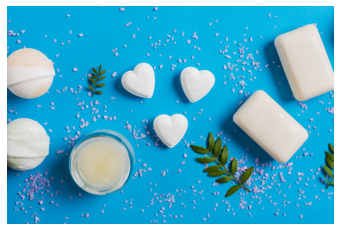

In [1]:
from skimage import color
from skimage.filters import sobel
import matplotlib.pyplot as plt

im=plt.imread('/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Python4Imgprocessing_Datacamp/soaps.jpg')
plt.imshow(im);plt.axis('off');plt.show()

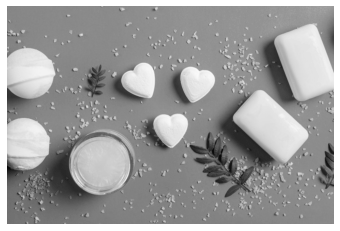

In [ ]:
#convert image to gray
im_g=color.rgb2gray(im)
plt.imshow(im_g,cmap='gray');plt.axis('off');plt.show()


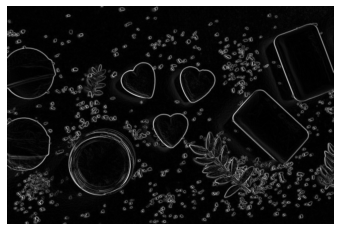

In [ ]:
#apply Sobel edge detection
edgeim=sobel(im_g)
plt.imshow(edgeim,cmap='gray');plt.axis('off');plt.show()


In [ ]:
def plot_comparison(original,filtered,title):
  fig,axes=plt.subplots(nrows=1,ncols=2)
  axes[0].imshow(original,cmap='gray'); axes[0].set_title('Original')
  axes[1].imshow(filtered,cmap='gray'); axes[1].set_title(title)
  for ax in axes:
    ax.axis('off')

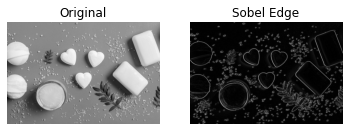

In [ ]:
plot_comparison(im_g,edgeim,'Sobel Edge')

### **Gaussian-Smoothening**

<ipython-input-6-c2dcefaf69dd>:2: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  gau=gaussian(im,multichannel=True)


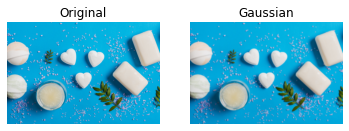

In [ ]:
from skimage.filters import gaussian
gau=gaussian(im,multichannel=True)
plot_comparison(im,gau,'Gaussian')


### **Contrast Enhancement**

What's the contrast of this image?

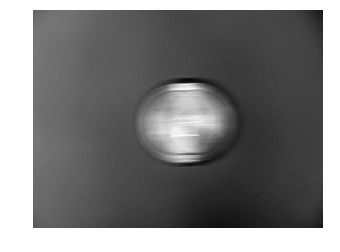
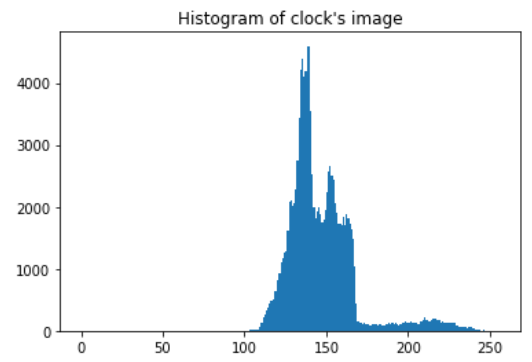

Histograms provide information about the distribution of pixel intensities in an image. By examining the histogram, you can determine the frequency of occurrence of each pixel intensity value in the image. The contrast of an image can also be determined from its histogram.

To calculate the contrast, you can compute the range of pixel intensities in the histogram. This involves subtracting the minimum pixel intensity value from the maximum value. The greater the range of pixel intensities, the higher the contrast in the image. A histogram with a wide range of pixel intensities indicates that the image has a high contrast, whereas a narrow range indicates a low contrast image.

You can obtain the maximum pixel intensity of the image by using the **np.max()**method from NumPy and the minimum with **np.min()**

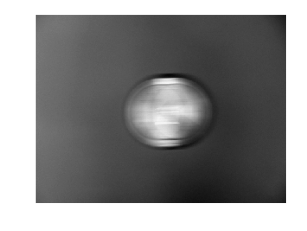

In [ ]:
#Load and display the image
image=plt.imread('/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Python4Imgprocessing_Datacamp/clock_image.png')
plt.imshow(image);plt.axis('off');plt.show()

In [ ]:
#calculate the minimum and the maximum intensity
import numpy as np
from skimage import color
#image=image[:,:,:3]
#ima=color.rgb2gray(image)
min=np.min(image)
max=np.max(image)
print(image.shape)
print("The minimum intensity is: {} and the maximim intesity is : {}".format(min,max))

(252, 340)
The minimum intensity is: 0.0235294122248888 and the maximim intesity is : 0.9999999403953552


### **Histogram Equalization for Contrast Enhancement**

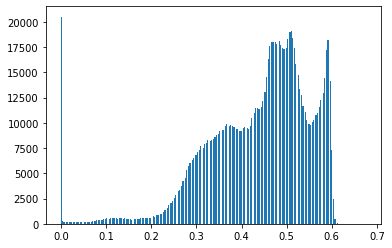

In [ ]:
im=plt.imread('/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Python4Imgprocessing_Datacamp/Chapter2/chest_xray_image.png')
#Plot histogram
his=plt.hist(im.ravel(),bins=256)
plt.show()


In [ ]:
#Equalize the histogram
from skimage import exposure
eqhist_img=exposure.equalize_hist(im)

In [ ]:
eqhist_img.shape

(1024, 1024)

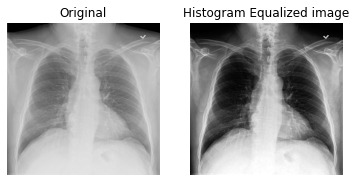

In [ ]:
#Display the images
plot_comparison(im,eqhist_img,'Histogram Equalized image')


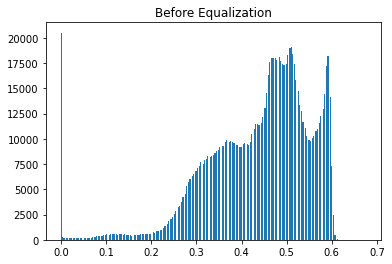

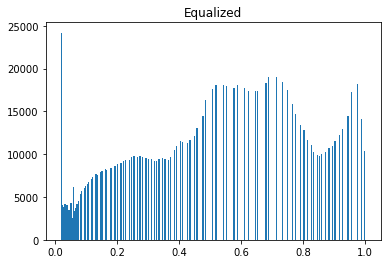

In [ ]:
# Display the two histograms
his=plt.hist(im.ravel(),bins=256)
plt.title('Before Equalization')
plt.show()
hist_e=plt.hist(eqhist_img.ravel(),bins=256)
plt.title('Equalized')
plt.show() 


**Enhance Aria Image**

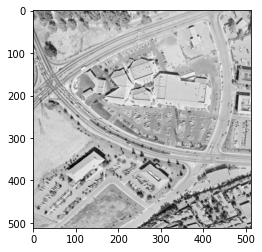

In [6]:
image_arial=plt.imread('/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Python4Imgprocessing_Datacamp/Chapter2/image_aerial.tiff')
plt.imshow(image_arial,cmap='gray')
plt.show()

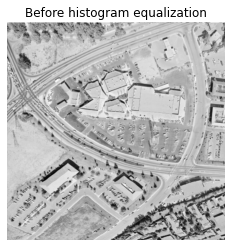

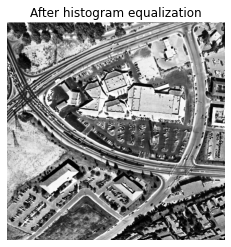

In [8]:
from skimage import exposure
arial_enhance=exposure.equalize_hist(image_arial)
plt.imshow(image_arial,cmap='gray')
plt.title('Before histogram equalization')
plt.axis('off')
plt.show()
plt.imshow(arial_enhance,cmap='gray')
plt.title('After histogram equalization')
plt.axis('off')
plt.show()

**CLAHE: Contarst Limited Adaptive Histogram Equalization(CLAHE)**

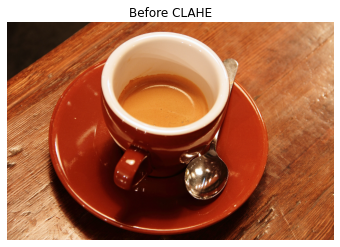

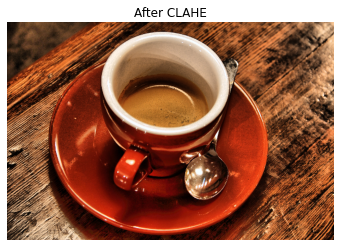

In [10]:
from skimage import data, exposure
im=data.coffee()
plt.imshow(im);
plt.title("Before CLAHE")
plt.axis('off')
plt.show()
im_clahe=exposure.equalize_adapthist(im,clip_limit=0.03)
plt.imshow(im_clahe);
plt.title("After CLAHE")
plt.axis('off')
plt.show()